In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score,confusion_matrix, roc_auc_score

from imblearn.over_sampling import SMOTE



In [12]:
df= pd.read_csv("creditcard.csv")

In [14]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

 Class
0    284315
1       492
Name: count, dtype: int64


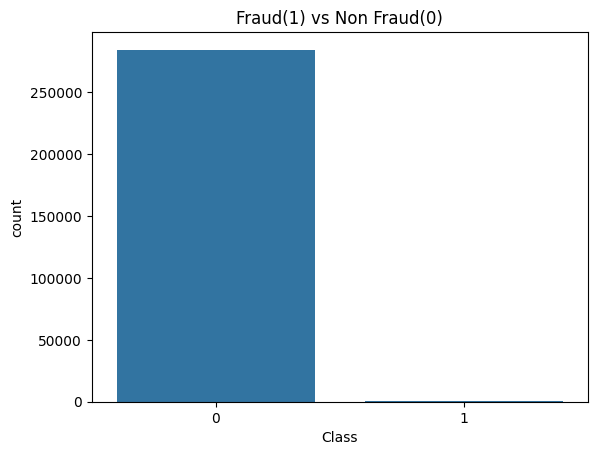

In [36]:
print(df.isnull().sum())
print("\n",df['Class'].value_counts())
sns.countplot(x=df['Class'])
plt.title("Fraud(1) vs Non Fraud(0)")
plt.show()

In [42]:
X=df.drop(columns=['Class'])
y=df['Class']
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [48]:
smote=SMOTE(sampling_strategy=0.5, random_state=44)
X_resampled, y_resampled= smote.fit_resample(X_scaled,y)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


In [103]:
logr=LogisticRegression(solver='liblinear',penalty='l1',C=0.1,class_weight='balanced',random_state=42)
logr.fit(X_train,y_train)
y_pred=logr.predict(X_test)
y_prob = logr.predict_proba(X_test)[:, 1]
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

Accuracy: 95.6422%
Precision: 0.9481
Recall: 0.9196
F1 Score: 0.9336
ROC-AUC Score: 0.9894
False Positive Percentage: 2.52%


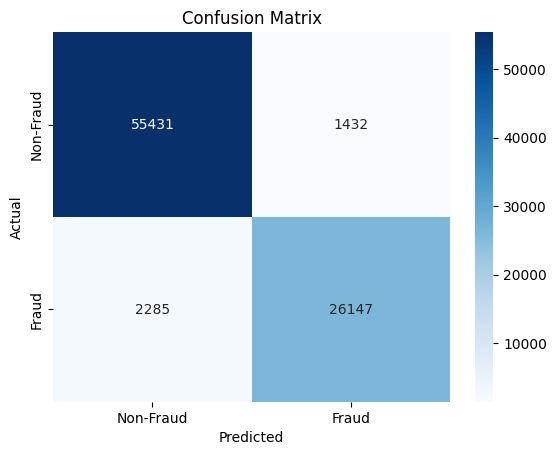

In [105]:
# Compute metrics
accuracy = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
false_positive_percentage = (fp / (fp + tn)) * 100
print(f"Accuracy: {accuracy:.4f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"False Positive Percentage: {false_positive_percentage:.2f}%")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


False Positive Percentage: 2.52%
